In [1]:
pwd

'/content'

In [2]:
fpath = "/content/drive/international-airline-passengers.csv"

In [3]:
import pandas as pd
df = pd.read_csv(fpath, usecols=[1])
df

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [4]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
data = df["Passengers"].values
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])

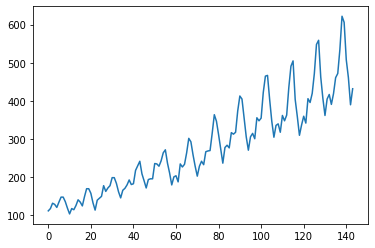

In [6]:
import matplotlib.pyplot as plt
plt.plot(data)
plt.show()

In [7]:
s_max = data.max()
data2 = data/s_max
data2

array([0.18006431, 0.18971061, 0.21221865, 0.2073955 , 0.19453376,
       0.2170418 , 0.23794212, 0.23794212, 0.21864952, 0.19131833,
       0.16720257, 0.18971061, 0.18488746, 0.20257235, 0.2266881 ,
       0.2170418 , 0.20096463, 0.23954984, 0.2733119 , 0.2733119 ,
       0.25401929, 0.21382637, 0.18327974, 0.22508039, 0.23311897,
       0.24115756, 0.28617363, 0.26205788, 0.27652733, 0.28617363,
       0.31993569, 0.31993569, 0.29581994, 0.26045016, 0.23472669,
       0.26688103, 0.27491961, 0.28938907, 0.31028939, 0.29099678,
       0.29421222, 0.35048232, 0.36977492, 0.38906752, 0.33601286,
       0.30707395, 0.27652733, 0.31189711, 0.31511254, 0.31511254,
       0.37942122, 0.3778135 , 0.3681672 , 0.39067524, 0.4244373 ,
       0.43729904, 0.38102894, 0.3392283 , 0.28938907, 0.32315113,
       0.32797428, 0.3022508 , 0.3778135 , 0.36495177, 0.37620579,
       0.4244373 , 0.48553055, 0.47106109, 0.41639871, 0.3681672 ,
       0.32636656, 0.3681672 , 0.38906752, 0.37459807, 0.42926

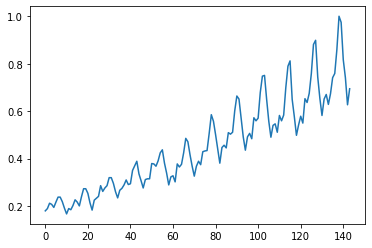

In [8]:
plt.plot(data2)
plt.show()

In [9]:
feature_nums = 12
import numpy as np
xs = [] # 독립변수 - 이전 12달의 승객수를 특성으로 갖게하자
ys = [] # 종속변수 - 이번달 승객 수
n = len(data2)
for i in range(n-feature_nums-1):
  xs.append(data2[i:i+12])
  ys.append(data2[i+12])
n_xs = np.array(xs)
n_ys = np.array(ys)
n_xs.shape, n_ys.shape

((131, 12), (131,))

In [10]:
from sklearn.model_selection import train_test_split
train_xs, test_xs, train_ys, test_ys = train_test_split(n_xs, n_ys)

In [11]:
from tensorflow import keras

In [12]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,1)))
model.add(keras.layers.LSTM(10))
model.add(keras.layers.Dense(1))
model.compile(loss = "mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(train_xs, train_ys, epochs=800)

Epoch 1/800
4/4 [==============================] - 5s 9ms/step - loss: 0.2268
Epoch 2/800
4/4 [==============================] - 0s 12ms/step - loss: 0.1474
Epoch 3/800
4/4 [==============================] - 0s 14ms/step - loss: 0.0979
Epoch 4/800
4/4 [==============================] - 0s 8ms/step - loss: 0.0677
Epoch 5/800
4/4 [==============================] - 0s 19ms/step - loss: 0.0395
Epoch 6/800
4/4 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 7/800
4/4 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 8/800
4/4 [==============================] - 0s 13ms/step - loss: 0.0147
Epoch 9/800
4/4 [==============================] - 0s 11ms/step - loss: 0.0139
Epoch 10/800
4/4 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 11/800
4/4 [==============================] - 0s 11ms/step - loss: 0.0141
Epoch 12/800
4/4 [==============================] - 0s 9ms/step - loss: 0.0125
Epoch 13/800
4/4 [==============================] - 0s

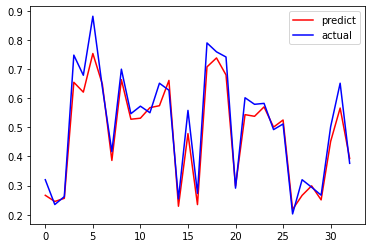

In [14]:
pval = model.predict(test_xs)
plt.plot(pval[:], "r", label = "predict")
plt.plot(test_ys, "b", label = "actual")
plt.legend()
plt.show()

In [15]:
pval2 = pval*s_max
for i,y in enumerate(test_ys):
  print(f"actual:{y*s_max:.0f} predict: {pval2[i][0]: .0f}")

actual:199 predict:  166
actual:146 predict:  153
actual:163 predict:  159
actual:465 predict:  407
actual:422 predict:  386
actual:548 predict:  468
actual:396 predict:  403
actual:259 predict:  240
actual:435 predict:  413
actual:340 predict:  328
actual:356 predict:  330
actual:342 predict:  353
actual:405 predict:  357
actual:390 predict:  411
actual:158 predict:  142
actual:347 predict:  297
actual:170 predict:  146
actual:491 predict:  440
actual:472 predict:  459
actual:461 predict:  423
actual:181 predict:  185
actual:374 predict:  338
actual:360 predict:  334
actual:362 predict:  354
actual:306 predict:  311
actual:318 predict:  327
actual:126 predict:  136
actual:199 predict:  166
actual:183 predict:  186
actual:166 predict:  156
actual:312 predict:  281
actual:405 predict:  352
actual:234 predict:  244


In [16]:
train_size = int(len(n_xs) * 0.75)
train_xs = n_xs[:train_size]
test_xs = n_xs[train_size:]
train_ys = n_ys[:train_size]
test_ys = n_ys[train_size:]
train_xs.shape, test_xs.shape

((98, 12), (33, 12))

In [17]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12,1)))
model.add(keras.layers.LSTM(10))
model.add(keras.layers.Dense(1))
model.compile(loss = "mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(train_xs, train_ys, epochs=800)

Epoch 1/800
4/4 [==============================] - 2s 7ms/step - loss: 0.1460
Epoch 2/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0990
Epoch 3/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0720
Epoch 4/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0530
Epoch 5/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0384
Epoch 6/800
4/4 [==============================] - 0s 7ms/step - loss: 0.0237
Epoch 7/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 8/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0108
Epoch 9/800
4/4 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 10/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0077
Epoch 11/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 12/800
4/4 [==============================] - 0s 6ms/step - loss: 0.0073
Epoch 13/800
4/4 [==============================] - 0s 6ms/st

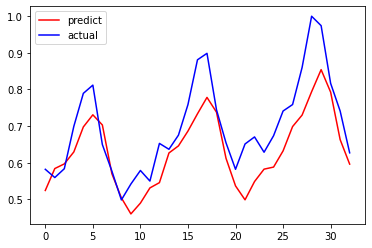

In [19]:
# 표를보면 뒤로갈수록 예측치와 차이가 심해지기때문에 셔플을 하는것이 더 좋을수도있음
pval = model.predict(test_xs)
plt.plot(pval[:], "r", label = "predict")
plt.plot(test_ys, "b", label = "actual")
plt.legend()
plt.show()